<a href="https://colab.research.google.com/github/toryn13/stats_files/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T Test and regression examples with ITT data


The mtdh gene in the mouse liver was targeted for knockout using the Cre/Flox system. Following this genetic manipulation, an insulin tolerance test was conducted on two groups comprising 7 Cre+ and 7 Cre– mice. Insulin was administered (IP) at T=0, and subsequent blood glucose levels were measured at intervals: T=15, T=30, T=60, and T=90, allowing the assessment of glucose dynamics over time in both groups

###Run theses to transfer the ITT file

In [ ]:
!wget https://raw.githubusercontent.com/toryn13/stats_files/main/ITT_data.csv

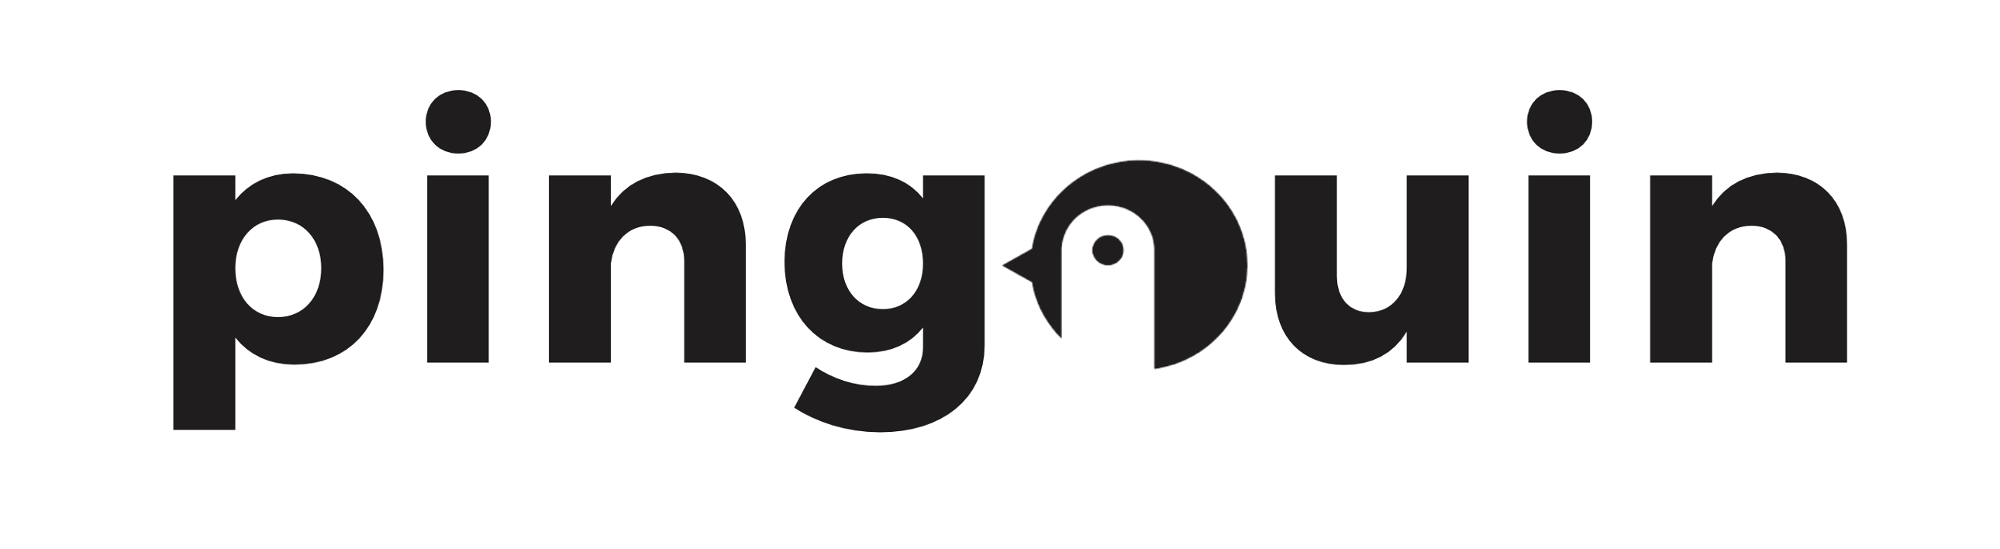

In [ ]:
!pip install pingouin

https://pandas.pydata.org/

In [5]:
import pandas as pd
import numpy as np
import pingouin as pg

## Import the data

In [ ]:

# Load the dataset 'ITT_data.csv' using pd.read_csv
ITT = pd.read_csv('ITT_data.csv')

# Display the first few rows of the dataset using the head() function
ITT.head()




,mouse,Genotype,T0,T15,T30,T60,T90
0,1,+,8.5,6.4,5.2,5.0,7.8
1,2,-,8.0,6.0,4.7,8.1,8.1
2,3,+,8.3,5.4,3.5,3.7,4.9
3,4,+,7.1,5.2,3.9,3.6,4.3
4,5,+,7.3,5.8,5.0,5.8,7.8


###Transform data

In [ ]:

# Select the columns to be multiplied by 18
columns_to_multiply = ['T0', 'T15', 'T30', 'T60', 'T90']

# Multiply the selected columns by 18
ITT[columns_to_multiply] = ITT[columns_to_multiply] * 18

# Display the modified DataFrame
ITT



,mouse,Genotype,T0,T15,T30,T60,T90
0,1,+,153.0,115.2,93.6,90.0,140.4
1,2,-,144.0,108.0,84.6,145.8,145.8
2,3,+,149.4,97.2,63.0,66.6,88.2
3,4,+,127.8,93.6,70.2,64.8,77.4
4,5,+,131.4,104.4,90.0,104.4,140.4
5,6,-,181.8,100.8,99.0,111.6,118.8
6,7,+,180.0,106.2,97.2,82.8,117.0
7,8,+,167.4,84.6,55.8,46.8,NaN
8,9,-,149.4,111.6,88.2,70.2,93.6
9,10,-,120.6,106.2,108.0,113.4,133.2


###Summary data

In [ ]:
# Use the describe() function to get a summary of the dataset
ITT.describe()

,mouse,T0,T15,T30,T60,T90
count,18.000000,18.000000,18.000000,18.000000,18.000000,17.000000
mean,9.500000,8.294444,5.727778,4.961111,5.111111,6.370588
std,5.338539,1.069069,0.923424,1.010031,1.474046,1.391386
min,1.000000,6.700000,4.200000,3.100000,2.600000,4.300000
25%,5.250000,7.450000,4.975000,4.250000,4.025000,5.000000
50%,9.500000,8.150000,5.850000,5.000000,4.900000,6.500000
75%,13.750000,9.100000,6.150000,5.475000,6.275000,7.800000
max,18.000000,10.100000,7.400000,7.000000,8.100000,8.400000


#T Test: Things to consider:
- The design (paired or unpaired(independent/2sample)
- The direction (one or two tails) e.g. one tailed-we know the direction
- degrees of freedom (depends on the test used)

###Paired T Test

$\Huge t=  \frac{m}{s/\sqrt{n}}$

s = standard deviation
m= mean difference
n = observations

In [ ]:
# Perform a paired t-test on the 'T0' and 'T30' columns
t_test_result = pg.ttest(ITT['T0'],ITT['T30'], paired=True)

# Perform a paired t-test on the 'T0' and 'T60' columns

# Interpret the results of the t-test

t_test_result


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.399158,17,two-sided,8.697257e-09,"[2.66, 4.01]",3.205223,1.394e+06,1.0


I haven't double checked this code....

In [71]:
paired_diff = ITT['T0'] - ITT['T60']

# Calculate the mean, standard deviation, and number of paired samples
m = np.mean(paired_diff)
s = np.std(paired_diff, ddof=1)  # ddof=1 for sample standard deviation
n = len(paired_diff)

# Calculate the t-statistic
t_statistic = m / (s / np.sqrt(n))
t_statistic

#d.f = n-1

7.597218515770171

###Group summary

In [ ]:
# Group the data by the 'Genotype' column using groupby
grouped_data = ITT.groupby(___)

# Use the describe() function on the grouped data
grouped_data.describe()


###Two-sample T Test

$\Huge t = \frac{{\bar{x}_1 - \bar{x}_2}}{{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}}$




$\bar{x}$ =mean
s = standard deviation
n= observations

In [ ]:
# Create two separate DataFrames (Cre_pos and Cre_neg) for positive and negative genotypes
Cre_pos = ITT.loc[ITT['Genotype'] == ___]
Cre_neg = ITT.loc[ITT['Genotype'] == ___]

# Perform an independent samples t-test on the 'T60' values of Cre_pos and Cre_neg
t_test_result_ind = pg.ttest(___, ___, paired=False)

# Interpret the results of the t-test
t_test_result_ind


# loc vs iloc

#iloc (Integer Location):

## Select the element in the first row and first column
value = df.iloc[0, 0]

#loc (Label Location)

## Select the element in the row labeled 'x' and column labeled 'A'
value = df.loc['x', 'A']

Not checked this.....

In [76]:

Cre_pos = ITT.loc[ITT['Genotype'] == "+"]
Cre_neg = ITT.loc[ITT['Genotype'] == "-"]


# Calculate sample means
mean1 = np.mean(Cre_pos['T30'])
mean2 = np.mean(Cre_neg['T30'])

# Calculate sample standard deviations
std1 = np.std(Cre_pos['T30'], ddof=1)
std2 = np.std(Cre_neg['T30'], ddof=1)

# Calculate sample sizes
n1 = len(Cre_pos)
n2 = len(Cre_neg)

# Calculate the t-statistic
t_statistic = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Print the results
print(f"T-Statistic: {t_statistic}")

#d.f 2n-2




T-Statistic: -0.7857843751996844


###Box plots

In [77]:
fig = px.box(ITT, x="Genotype", y="T30")
fig.update_layout(plot_bgcolor = "white")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

###Reshape data

In [ ]:
ITT_tidy=pd.melt(ITT, id_vars=['Genotype', 'mouse'], value_vars=['T0','T15', 'T30','T60','T90'],var_name='Time', value_name='Glucose')

###Line plots for mean and SD

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming your DataFrame is named 'df'
# Remove 'T' from the 'Time' column
ITT_tidy['Time'] = ITT_tidy['Time'].str.replace('T', '')

# Calculate mean and standard deviation
grouped_data = ITT_tidy.groupby(['Time', 'Genotype'])['Glucose'].agg(['mean', 'std']).reset_index()

fig = px.line(grouped_data, x='Time', y='mean', color='Genotype',
              error_y='std', labels={'mean': 'Mean Glucose', 'std': 'Standard Deviation'})

# Customize the layout
fig.update_layout(
    title='Mean Glucose Over Time by Genotype',
    xaxis_title='Time',
    yaxis_title='Glucose Level',
    legend_title='Genotype',
    plot_bgcolor='white',  # Set background color to white
    xaxis=dict(linecolor='black'),  # Set x-axis color to black
    yaxis=dict(linecolor='black')   # Set y-axis color to black
)
# Add markers for the mean values
fig.update_traces(mode='markers+lines')

# Show the plot
fig.show()



##T test calculator from mean and SD

Look at figure 1,2,4 and 5

Compare N and I in each plot, estimate the mean and standard deviation, can you produce a p value between 0.05 and 0.01

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0203552

In [ ]:
import scipy.stats as stats

def two_sample_t_test(mean1, sd1, n1, mean2, sd2, n2):
    # Use scipy.stats.ttest_ind_from_stats for a two-sample t-test
    t_statistic, p_value = stats.ttest_ind_from_stats(mean1, sd1, n1, mean2, sd2, n2)
    return t_statistic, p_value


In [65]:
# Example usage:
mean1 = 100
sd1 = 10
n1 = 4

mean2 = 35
sd2 = 4
n2 = 4

p_value = two_sample_t_test(mean1, sd1, n1, mean2, sd2, n2)
p_value

(12.070196981508373, 1.963293871304594e-05)

###Linear regression

In [ ]:

# Use the pg.linear_regression function to perform a linear regression analysis
lm = pg.linear_regression(___, ___)

# Interpret the results of the linear regression
lm


In [2]:
!wget https://raw.githubusercontent.com/toryn13/qiime2demo/main/picogreen.csv

--2023-11-15 09:54:04--  https://raw.githubusercontent.com/toryn13/qiime2demo/main/picogreen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133 [text/plain]
Saving to: ‘picogreen.csv’

picogreen.csv       100%[===================>]     133  --.-KB/s    in 0s      

2023-11-15 09:54:04 (9.16 MB/s) - ‘picogreen.csv’ saved [133/133]



In this example we are using a standard curve to estimate some unknown DNA concentrations. The picogreen assay detects double stranded DNA.

In [6]:
picogreen=pd.read_csv("/content/picogreen.csv")

Here's the standard curve, can you plot this?

In [7]:
picogreen

,ng/well,FL1,FL2
0,50.000,38763728,41200392
1,5.000,3703704,3941495
2,0.500,530351,527938
3,0.050,189474,183869
4,0.005,147661,146664
5,0.000,147020,143230


from matplotlib import pyplot as plt
picogreen['ng/well'].plot(kind='hist', bins=20, title='ng/well')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
picogreen['FL1'].plot(kind='hist', bins=20, title='FL1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
picogreen['FL2'].plot(kind='hist', bins=20, title='FL2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
picogreen.plot(kind='scatter', x='ng/well', y='FL1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
picogreen.plot(kind='scatter', x='FL1', y='FL2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
picogreen['ng/well'].plot(kind='line', figsize=(8, 4), title='ng/well')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
picogreen['FL1'].plot(kind='line', figsize=(8, 4), title='FL1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
picogreen['FL2'].plot(kind='line', figsize=(8, 4), title='FL2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [82]:
lm = pg.linear_regression(picogreen['ng/well'], picogreen['FL1'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,89748.747715,63250.397463,1.418944,2.289159e-01,0.999936,0.99992,-85862.508723,265360.004153
1,ng/well,772989.749144,3083.091949,250.719006,1.518295e-09,0.999936,0.99992,764429.713594,781549.784694


FL1=89748.7+772989.7x ng/well

Calculate the uknowns

In [1]:
(38763728-89748.7)/772989.7

50.03168774435157

Make up some unkowns

In [85]:
random_numbers = np.random.randint(143230, 41200393, size=10)
random_numbers


array([31898568, 26970102, 39219433, 37531313,  4523462, 17092364,
       39196685, 13848040, 37451444, 17285039])

## GTT data example

In this example we have treated mice with dexamethasone (DEX) or phosphate buffered saline (PBS) for 6 weeks (IP injections on alterate days, 1mg/kg) and  glucose tolerance was assessed. The mice were injected with glucose (2g/kg), blood glucose levels were then determined.

In [ ]:
!wget https://raw.githubusercontent.com/toryn13/stats_files/main/GTT.csv

--2023-11-14 10:29:03--  https://raw.githubusercontent.com/toryn13/stats_files/main/GTT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1069 (1.0K) [text/plain]
Saving to: ‘GTT.csv’

GTT.csv             100%[===================>]   1.04K  --.-KB/s    in 0s      

2023-11-14 10:29:03 (108 MB/s) - ‘GTT.csv’ saved [1069/1069]



In [ ]:
GTT=pd.read_csv("/content/GTT.csv")

In [ ]:
GTT

,group,T1,T2,T3,T4,T5,treatment,animal
0,1,8.5,17.6,14.4,12.4,11.3,PBS,1
1,1,7.3,21.0,15.0,13.7,13.0,PBS,2
2,1,8.0,18.7,18.5,11.6,14.1,PBS,3
3,1,10.5,16.7,20.8,12.5,13.7,PBS,4
4,1,7.7,19.3,18.1,10.2,11.0,PBS,5
5,1,8.6,18.6,12.3,8.3,11.6,PBS,6
6,1,8.5,18.7,18.7,9.5,8.9,PBS,7
7,1,10.0,22.2,19.5,14.1,13.9,PBS,8
8,2,8.0,17.5,20.6,12.8,10.5,PBS,9
9,2,8.6,19.5,18.7,19.1,9.1,PBS,10


from matplotlib import pyplot as plt
GTT['group'].plot(kind='hist', bins=20, title='group')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
GTT['T1'].plot(kind='hist', bins=20, title='T1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
GTT['T2'].plot(kind='hist', bins=20, title='T2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
GTT['T3'].plot(kind='hist', bins=20, title='T3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
GTT.groupby('treatment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
GTT.plot(kind='scatter', x='group', y='T1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
GTT.plot(kind='scatter', x='T1', y='T2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
GTT.plot(kind='scatter', x='T2', y='T3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
GTT.plot(kind='scatter', x='T3', y='T4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['group']
  ys = series['T1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = GTT.sort_values('group', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('treatment')):
  _plot_series(series, series_name, i)
  fig.legend(title='treatment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('group')
_ = plt.ylabel('T1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['group']
  ys = series['T2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = GTT.sort_values('group', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('treatment')):
  _plot_series(series, series_name, i)
  fig.legend(title='treatment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('group')
_ = plt.ylabel('T2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['group']
  ys = series['T3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = GTT.sort_values('group', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('treatment')):
  _plot_series(series, series_name, i)
  fig.legend(title='treatment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('group')
_ = plt.ylabel('T3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['group']
  ys = series['T4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = GTT.sort_values('group', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('treatment')):
  _plot_series(series, series_name, i)
  fig.legend(title='treatment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('group')
_ = plt.ylabel('T4')

from matplotlib import pyplot as plt
GTT['group'].plot(kind='line', figsize=(8, 4), title='group')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
GTT['T1'].plot(kind='line', figsize=(8, 4), title='T1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
GTT['T2'].plot(kind='line', figsize=(8, 4), title='T2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
GTT['T3'].plot(kind='line', figsize=(8, 4), title='T3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(GTT['treatment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(GTT, x='group', y='treatment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(GTT['treatment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(GTT, x='T1', y='treatment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(GTT['treatment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(GTT, x='T2', y='treatment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(GTT['treatment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(GTT, x='T3', y='treatment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

1. Data Transformation and Normalization
   - Extract the provided insulin tolerance test data into a Pandas DataFrame and convert the glucose units from millimoles per liter (mM) to milligrams per deciliter (mg/dl) using the formula mM x 18.
   
2. Mean and Standard Deviation Calculation
   - Calculate the average (mean) and standard deviation of blood glucose at each timepoint (T=1, T,=2 T=3, T=4, and T=5 for both the PBS and DEX treated mice.
3. Data Reshaping
   - Reshape the data for all timepoints (T1-5) to a long format using Pandas.
4. Data Visualization
   - Plot the mean glucose levels and their respective standard deviations for each timepoint against time, separately for PBS and DEX treated mice.
5. Paired T-Test
   - Conduct a paired T-test to compare the difference between glucose levels at T=1 and T=3 for all mice in the study.

6. Two-Sample T-Test
   - Perform a two-sample T-test to compare the difference between PBS and DEX treated– mice at T=3.

8. Inference from Statistical Analysis
   - Based on the outcomes of the statistical tests performed, analyze and interpret whether there exists a difference between the different treatments in this study.
